In [1]:
import sys, pandas as pd, numpy as np, matplotlib.pyplot as plt, skimage, os, math, time
from skimage import io, data
from datetime import timedelta
from PIL import Image

In [2]:
def show_img(p):
    # Path to images
    filename = os.path.join(os.getcwd()+'/data', p)
    # Loading image via nparray
    image = skimage.io.imread(filename)
    return(image)

In [3]:
def get_clstrd_image(k, p, ca = 0):
    # Reshaping the image
    filename = os.path.join(os.getcwd() + '/data', p)
    image = skimage.io.imread(filename)
    pixels = image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
    pixels = pixels.astype(np.float64)

    # Randomly choosing cluster centers
    centroids = pixels[np.random.randint(pixels.shape[0], size=(1, k))[0], :]


    clas = np.empty([pixels.shape[0], centroids.shape[0]], dtype = np.float64)
    i = 0
    converged = False
    start = time.time()
    
    while converged == False:
        i += 1
        pt_1 = np.sum(pixels**2,axis=1)[:,np.newaxis]
        pt_2 = np.sum(centroids**2, axis=1)
        pt_3 = -2 * np.dot(pixels,centroids.T)
        S = pt_1+pt_2+pt_3
        clas = np.ceil(np.sqrt(np.abs(pt_1+pt_2+pt_3)))

        # class is assigned as clstr_assignment, as class is a function
        clstr_assignment = np.argmin(clas, axis = 1)

        # Updating Cluster location(s)
        centroids_old = centroids.copy()
        c_a = [[i] for i in clstr_assignment]
        image_2_ca = np.append(pixels, c_a, axis = 1)

        for cntrd in range(0, centroids.shape[0]):
            centroids[cntrd] = np.ceil(np.sum(image_2_ca[image_2_ca[:,-1] == cntrd][:,:image_2_ca.shape[1]-1], axis = 0) / len(image_2_ca[image_2_ca[:,-1] == cntrd][:,-1]))

        if (centroids_old == centroids).all() == True:
            converged = True


    if ca == 1:
        return (clstr_assignment, centroids)
    
    else:
        end = time.time()
        Delta = end - start
        Elapsed=str(timedelta(seconds=Delta)) 
        print('cluster of k = {} converged at {} iterations, and took {} seconds'.format(k,i, Elapsed))
        # Updating each datapoint to its respective Centroid value
        image_2_cac = image_2_ca.copy()
        for i in range(0,image_2_ca.shape[0]):
            image_2_cac[i][:-1] = centroids[int(image_2_cac[i][-1])]
        image_2_cac = image_2_cac[:,:-1]
        final = np.reshape(image_2_cac, (image.shape[0],image.shape[1],image.shape[2]), order="C")
        final = final.astype(dtype='uint8')
        # Final image 
        img = Image.fromarray(final, 'RGB')
        return (img)

In [4]:
def get_compressed_imgs():
    for p in ['GeorgiaTech.bmp','football.bmp','foliage.jpg']:
        #Showing Original
        fig, ax = plt.subplots(figsize=(7, 7))
        ax.imshow(show_img(p = p))
        ax.set_title('Original')
        plt.show()
        # Setting up plot size
        fig, ax = plt.subplots(2,2,figsize=(9, 9))
        # Function to load the image on plot 
        ax[0,0].imshow(get_clstrd_image(k=2, p = p, ca = 0))
        ax[0,0].set_title('K=2')
        ax[0,1].imshow(get_clstrd_image(k=4, p = p, ca = 0))
        ax[0,1].set_title('K=4')
        ax[1,0].imshow(get_clstrd_image(k=8, p = p, ca = 0))
        ax[1,0].set_title('K=8')
        ax[1,1].imshow(get_clstrd_image(k=16, p = p, ca = 0))
        ax[1,1].set_title('K=16')
    fig.tight_layout()
    plt.show()

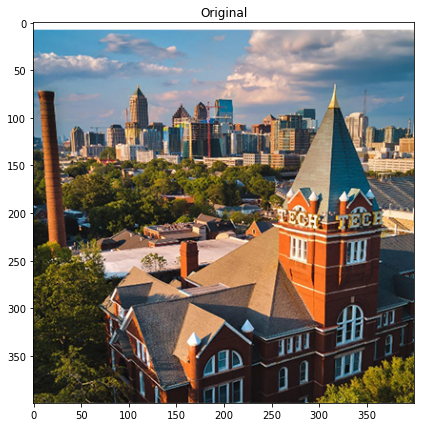

cluster of k = 2 converged at 5 iterations, and took 0:00:00.859356 seconds
cluster of k = 4 converged at 28 iterations, and took 0:00:04.414908 seconds
cluster of k = 8 converged at 44 iterations, and took 0:00:07.353018 seconds
cluster of k = 16 converged at 45 iterations, and took 0:00:08.356806 seconds


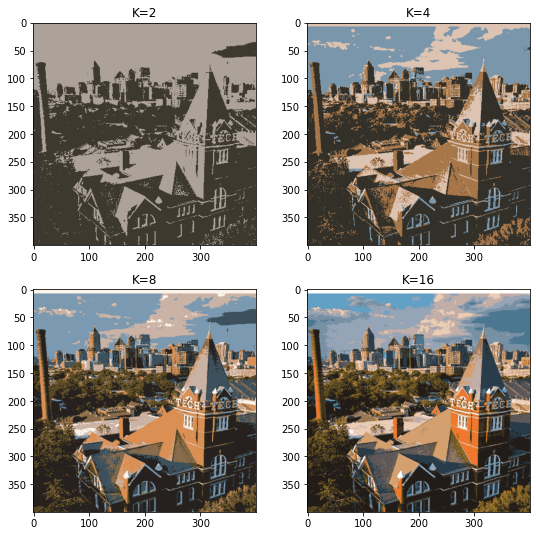

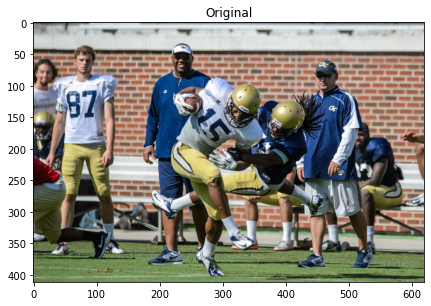

cluster of k = 2 converged at 8 iterations, and took 0:00:01.850399 seconds
cluster of k = 4 converged at 10 iterations, and took 0:00:02.417593 seconds
cluster of k = 8 converged at 43 iterations, and took 0:00:10.815824 seconds
cluster of k = 16 converged at 49 iterations, and took 0:00:13.843828 seconds


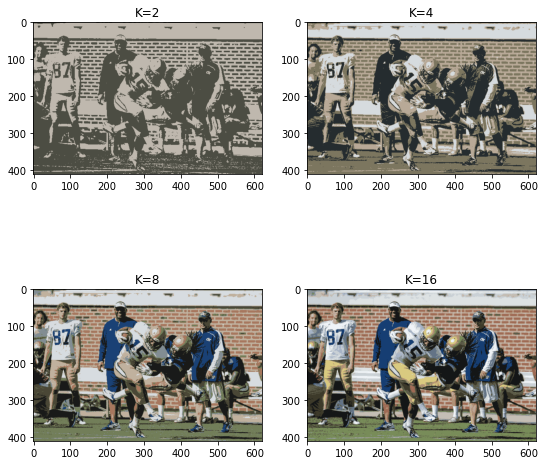

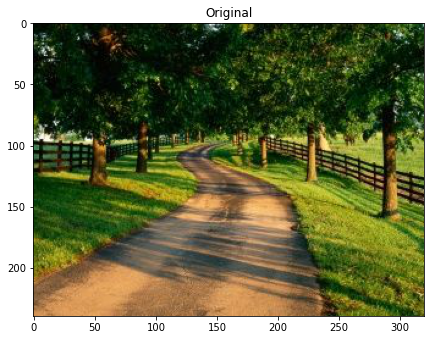

cluster of k = 2 converged at 11 iterations, and took 0:00:00.787969 seconds
cluster of k = 4 converged at 21 iterations, and took 0:00:01.507345 seconds
cluster of k = 8 converged at 25 iterations, and took 0:00:01.895812 seconds
cluster of k = 16 converged at 38 iterations, and took 0:00:03.348243 seconds


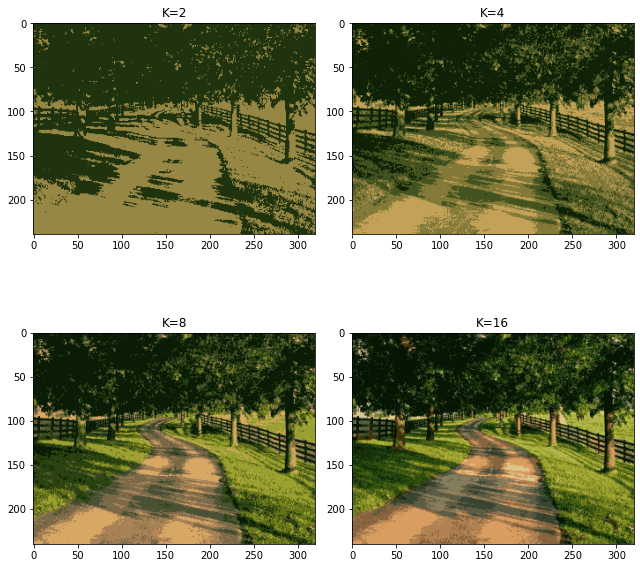

In [5]:
get_compressed_imgs()